# Lineare Regression

Der Daten für den Verbrauchspreisindex sind für das Jahr 2019 nicht verfügbar. Daher werden zwei Optionen getestet: 

1.) Trainieren eines Modells mit den Jahren 2020–2023 (mit Preisindex).
    
    - 223715 Datenpunkte, 91 features

2.) Trainieren eines Modells mit 2019–2023 (ohne Preisindex).

    - 381661 Datenpunkte, 77 features

Im Folgenden wird sich auf die Variante 2 fokussiert und der Datensatz mit den miensten Datenpubkte, aber ohne die Features zum Verbauchspreisindex gewählt.

In [410]:
import pandas as pd

df = pd.read_csv("../daten/Merged_BSR_24Uhr.csv")

In [411]:
df.head()

,Schicht,Tour,Tonnage,Temperature_Max (°C),Rain_Sum (mm),Snowfall_Sum (cm),Wind_Speed_Max (km/h),Daylight_Duration (s),Temperature_Max (°C) 3-Day Avg,Rain_Sum (mm) 3-Day Avg,...,Feiertag_Pfingstmontag_shift_1,Feiertag_Pfingstmontag_shift_2,Feiertag_Tag der Arbeit_shift_1,Feiertag_Tag der Arbeit_shift_2,Feiertag_Tag der Befreiung_shift_1,Feiertag_Tag der Befreiung_shift_2,Feiertag_Tag der Deutschen Einheit_shift_1,Feiertag_Tag der Deutschen Einheit_shift_2,Feiertag_Zweiter Weihnachtstag_shift_1,Feiertag_Zweiter Weihnachtstag_shift_2
0,1,1,5.59,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,3.23,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5,5.68,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6,5.48,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,7,7.84,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [412]:
df.describe()

,Schicht,Tour,Tonnage,Temperature_Max (°C),Rain_Sum (mm),Snowfall_Sum (cm),Wind_Speed_Max (km/h),Daylight_Duration (s),Temperature_Max (°C) 3-Day Avg,Rain_Sum (mm) 3-Day Avg,...,Feiertag_Pfingstmontag_shift_1,Feiertag_Pfingstmontag_shift_2,Feiertag_Tag der Arbeit_shift_1,Feiertag_Tag der Arbeit_shift_2,Feiertag_Tag der Befreiung_shift_1,Feiertag_Tag der Befreiung_shift_2,Feiertag_Tag der Deutschen Einheit_shift_1,Feiertag_Tag der Deutschen Einheit_shift_2,Feiertag_Zweiter Weihnachtstag_shift_1,Feiertag_Zweiter Weihnachtstag_shift_2
count,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,381661.000000,...,381661.0,381661.0,381661.0,381661.0,381661.0,381661.0,381661.0,381661.0,381661.0,381661.0
mean,1.018522,143.118574,12.125463,15.146716,1.643809,0.061519,19.949507,44466.500889,15.186362,1.519789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.134828,529.435676,5.993363,8.440446,3.558954,0.305219,6.834062,11275.498180,8.316128,2.168854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,0.100000,-7.200000,0.000000,0.000000,7.900000,27516.100000,-6.633333,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,11.000000,8.080000,8.200000,0.000000,0.000000,15.100000,33653.080000,8.233333,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,23.000000,11.100000,15.300000,0.200000,0.000000,18.800000,44861.230000,14.933333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,41.000000,16.910000,21.600000,1.600000,0.000000,23.700000,55288.220000,22.000000,2.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.000000,5513.000000,59.580000,37.700000,41.300000,4.900000,49.700000,60622.050000,33.900000,23.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [413]:
df.shape

(381661, 91)

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381661 entries, 0 to 381660
Data columns (total 91 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Schicht                                     381661 non-null  int64  
 1   Tour                                        381661 non-null  int64  
 2   Tonnage                                     381661 non-null  float64
 3   Temperature_Max (°C)                        381661 non-null  float64
 4   Rain_Sum (mm)                               381661 non-null  float64
 5   Snowfall_Sum (cm)                           381661 non-null  float64
 6   Wind_Speed_Max (km/h)                       381661 non-null  float64
 7   Daylight_Duration (s)                       381661 non-null  float64
 8   Temperature_Max (°C) 3-Day Avg              381661 non-null  float64
 9   Rain_Sum (mm) 3-Day Avg                     381661 non-null  float64
 

In [415]:
print(df.isna().sum().sum())

787787


### Entfernen des Verbauchspreisindex für das Jahr 2019 (keine Daten für diesen Zeitraum)

In [416]:
print(df.columns.tolist())  # Gibt die exakten Spaltennamen aus

['Schicht', 'Tour', 'Tonnage', 'Temperature_Max (°C)', 'Rain_Sum (mm)', 'Snowfall_Sum (cm)', 'Wind_Speed_Max (km/h)', 'Daylight_Duration (s)', 'Temperature_Max (°C) 3-Day Avg', 'Rain_Sum (mm) 3-Day Avg', 'Snowfall_Sum (cm) 3-Day Avg', 'Wind_Speed_Max (km/h) 3-Day Avg', 'Daylight_Duration (s) 3-Day Avg', 'SPD', 'Grünen', 'CDU', 'Linke', 'AfD', 'FDP', 'Sonstige', 'Feiertag', 'Feiertag_Christi Himmelfahrt', 'Feiertag_Erster Weihnachtstag', 'Feiertag_Internationaler Frauentag', 'Feiertag_Karfreitag', 'Feiertag_Neujahr', 'Feiertag_Ostermontag', 'Feiertag_Pfingstmontag', 'Feiertag_Tag der Arbeit', 'Feiertag_Tag der Befreiung', 'Feiertag_Tag der Deutschen Einheit', 'Feiertag_Zweiter Weihnachtstag', 'Wochentag', '   Brot', 'Fleisch', '    Fisch', '    Molkerei-Eier', '    Speisefette-öle', '    Obst', '    Gemüse', '    Zucker, Marmelade, Honig', '    Fertigerichte', '  Kaffee-Tee', '    Wasser-Saft', 'TageZuvorNichtGeliefert', 'Ferientag', 'Saison_Frühling', 'Saison_Herbst', 'Saison_Sommer', 

In [417]:
df.columns = df.columns.str.strip()  # alle führenden und nachfolgenden Leerzeichen entfernen

In [418]:
preisindex_spalten = ["Brot", "Fleisch", "Fisch", "Molkerei-Eier", 
                      "Speisefette-öle", "Obst", "Gemüse", "Zucker, Marmelade, Honig", 
                      "Fertigerichte", "Kaffee-Tee", "Wasser-Saft"]

df_cleaned = df.drop(columns=preisindex_spalten)

In [419]:
df_cleaned.head() 

,Schicht,Tour,Tonnage,Temperature_Max (°C),Rain_Sum (mm),Snowfall_Sum (cm),Wind_Speed_Max (km/h),Daylight_Duration (s),Temperature_Max (°C) 3-Day Avg,Rain_Sum (mm) 3-Day Avg,...,Feiertag_Pfingstmontag_shift_1,Feiertag_Pfingstmontag_shift_2,Feiertag_Tag der Arbeit_shift_1,Feiertag_Tag der Arbeit_shift_2,Feiertag_Tag der Befreiung_shift_1,Feiertag_Tag der Befreiung_shift_2,Feiertag_Tag der Deutschen Einheit_shift_1,Feiertag_Tag der Deutschen Einheit_shift_2,Feiertag_Zweiter Weihnachtstag_shift_1,Feiertag_Zweiter Weihnachtstag_shift_2
0,1,1,5.59,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,3.23,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5,5.68,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6,5.48,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,7,7.84,3.6,0.0,0.0,31.2,27967.86,6.133333,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [420]:
df_cleaned.columns

Index(['Schicht', 'Tour', 'Tonnage', 'Temperature_Max (°C)', 'Rain_Sum (mm)',
       'Snowfall_Sum (cm)', 'Wind_Speed_Max (km/h)', 'Daylight_Duration (s)',
       'Temperature_Max (°C) 3-Day Avg', 'Rain_Sum (mm) 3-Day Avg',
       'Snowfall_Sum (cm) 3-Day Avg', 'Wind_Speed_Max (km/h) 3-Day Avg',
       'Daylight_Duration (s) 3-Day Avg', 'SPD', 'Grünen', 'CDU', 'Linke',
       'AfD', 'FDP', 'Sonstige', 'Feiertag', 'Feiertag_Christi Himmelfahrt',
       'Feiertag_Erster Weihnachtstag', 'Feiertag_Internationaler Frauentag',
       'Feiertag_Karfreitag', 'Feiertag_Neujahr', 'Feiertag_Ostermontag',
       'Feiertag_Pfingstmontag', 'Feiertag_Tag der Arbeit',
       'Feiertag_Tag der Befreiung', 'Feiertag_Tag der Deutschen Einheit',
       'Feiertag_Zweiter Weihnachtstag', 'Wochentag',
       'TageZuvorNichtGeliefert', 'Ferientag', 'Saison_Frühling',
       'Saison_Herbst', 'Saison_Sommer', 'Saison_Winter', 'year', 'month',
       'day', 'Tonnage_dealy_1', 'Tonnage_dealy_2', 'Tonnage_dealy_3'

## Daten bereinigen & Feature Engineering

In [421]:
# Fehlende Werte prüfen
df_cleaned.isnull().sum()

Schicht                                       0
Tour                                          0
Tonnage                                       0
Temperature_Max (°C)                          0
Rain_Sum (mm)                                 0
                                             ..
Feiertag_Tag der Befreiung_shift_2            0
Feiertag_Tag der Deutschen Einheit_shift_1    0
Feiertag_Tag der Deutschen Einheit_shift_2    0
Feiertag_Zweiter Weihnachtstag_shift_1        0
Feiertag_Zweiter Weihnachtstag_shift_2        0
Length: 80, dtype: int64

In [422]:
df_cleaned.isna().sum()

Schicht                                       0
Tour                                          0
Tonnage                                       0
Temperature_Max (°C)                          0
Rain_Sum (mm)                                 0
                                             ..
Feiertag_Tag der Befreiung_shift_2            0
Feiertag_Tag der Deutschen Einheit_shift_1    0
Feiertag_Tag der Deutschen Einheit_shift_2    0
Feiertag_Zweiter Weihnachtstag_shift_1        0
Feiertag_Zweiter Weihnachtstag_shift_2        0
Length: 80, dtype: int64

In [423]:
print(df_cleaned.isna().sum().sum())

0


In [229]:
# Datensatz zum Trainieren speichern
df_cleaned.to_csv("train_2019_2023.csv", index=False)

# Datensatz für das Training laden

In [524]:
import pandas as pd

df = pd.read_csv("../daten/train_2019_2023.csv")

## Daten aufteilen

In [525]:
# Trainingsdaten (2019, 2020, 2021)
train_data = df[df['year'].isin([2019, 2020, 2021])]

# Validierungsdaten (2023)
validation_data = df[df['year'] == 2022]

# Testdaten (2022)
test_data = df[df['year'] == 2023]

In [526]:
# Zielvariable
y_train = train_data["Tonnage"]
y_test = test_data["Tonnage"]
y_val = validation_data["Tonnage"]

# Features
X_train = train_data.drop(columns=['Tonnage', 'year', 'day'])
X_test = test_data.drop(columns=['Tonnage', 'year', 'day'])
X_val = validation_data.drop(columns=['Tonnage', 'year', 'day'])

## Standardisierung

**StandardScaler**

Die Standardisierung transformiert die Daten so, dass sie eine Mittelwert von 0 und eine Standardabweichung von 1 haben. Es wird keine Skalierung auf einen festen Bereich angewendet.

Wann ist es sinnvoll?

Wenn die Daten eine normalverteilte Verteilung haben oder die Verteilung unbekannt ist.
Für Modelle, die auf der Berechnung von Abständen oder Gradienten basieren, wie z. B. lineare Regression, logistische Regression, Support Vector Machines (SVM), k-nearest neighbors (k-NN) und neuronale Netze.



In [527]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Features, die standardisiert werden sollen
numerical_features = [
    'Rain_Sum (mm)', 
    'Snowfall_Sum (cm)', 
    'Wind_Speed_Max (km/h)', 
    'Daylight_Duration (s)',
    'Temperature_Max (°C) 3-Day Avg', 
    'Rain_Sum (mm) 3-Day Avg',
    'Snowfall_Sum (cm) 3-Day Avg', 
    'Wind_Speed_Max (km/h) 3-Day Avg',
    'Daylight_Duration (s) 3-Day Avg'
]

# Standardisierung der Trainingsdaten
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Standardisierung der Testdaten (mit denselben Parametern wie für die Trainingsdaten)
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Standardisierung der Validierungsdaten (mit denselben Parametern wie für die Trainingsdaten)
X_val[numerical_features] = scaler.transform(X_val[numerical_features])


In [528]:
X_train.head()

,Schicht,Tour,Temperature_Max (°C),Rain_Sum (mm),Snowfall_Sum (cm),Wind_Speed_Max (km/h),Daylight_Duration (s),Temperature_Max (°C) 3-Day Avg,Rain_Sum (mm) 3-Day Avg,Snowfall_Sum (cm) 3-Day Avg,...,Feiertag_Pfingstmontag_shift_1,Feiertag_Pfingstmontag_shift_2,Feiertag_Tag der Arbeit_shift_1,Feiertag_Tag der Arbeit_shift_2,Feiertag_Tag der Befreiung_shift_1,Feiertag_Tag der Befreiung_shift_2,Feiertag_Tag der Deutschen Einheit_shift_1,Feiertag_Tag der Deutschen Einheit_shift_2,Feiertag_Zweiter Weihnachtstag_shift_1,Feiertag_Zweiter Weihnachtstag_shift_2
0,1,1,3.6,-0.466407,-0.200949,1.76435,-1.461315,-1.073739,-0.376103,-0.246033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,3.6,-0.466407,-0.200949,1.76435,-1.461315,-1.073739,-0.376103,-0.246033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5,3.6,-0.466407,-0.200949,1.76435,-1.461315,-1.073739,-0.376103,-0.246033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6,3.6,-0.466407,-0.200949,1.76435,-1.461315,-1.073739,-0.376103,-0.246033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,7,3.6,-0.466407,-0.200949,1.76435,-1.461315,-1.073739,-0.376103,-0.246033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [529]:
print(X_train.isna().sum().sum())

0


In [530]:
X_train.shape

(223715, 77)

## Modell trainieren

In [531]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn

In [532]:
# Schritt 1: Lineares Regressionsmodell erstellen
model = LinearRegression()

In [533]:
# Schritt 2: Modell mit den Trainingsdaten trainieren
model.fit(X_train, y_train)


LinearRegression()

In [534]:
y_pred_train = model.predict(X_train)

print("\n🔹 Trainingsergebnisse (2019-2021):")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train)}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train)}")
print(f"R²: {r2_score(y_train, y_pred_train)}")


🔹 Trainingsergebnisse (2019-2021):
MAE: 3.1348331387165325
MSE: 16.641125382184022
R²: 0.5296790196513221


In [535]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_pred_train)

# RMSE manuell berechnen
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 4.08


## Vorhersage auf den Validierungsdaten

In [536]:
# Vorhersagen auf dem Validierungsdatensatz
y_val_pred = model.predict(X_val)

In [537]:
print("\n🔹 Ergebnisse auf den Validierungsdaten (2022):")
print(f"MAE: {mean_absolute_error(y_val, y_val_pred)}")
print(f"MSE: {mean_squared_error(y_val, y_val_pred)}")
print(f"R²: {r2_score(y_val, y_val_pred)}")


🔹 Ergebnisse auf den Validierungsdaten (2022):
MAE: 3.179359276343431
MSE: 17.00980778585116
R²: 0.49946365015512906


**root mean squared error**

In [538]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_val_pred)

# RMSE manuell berechnen
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.2f}")

RMSE: 4.12


## Evaluation auf den Validierungsdaten

#### MAE (Mean Absolute Error) – 3.18

- Bedeutung: Der durchschnittliche absolute Fehler des Modells in den Vorhersagen. Es gibt an, wie weit die Vorhersagen im Durchschnitt von den tatsächlichen Werten entfernt sind.
- Interpretation: Ein MAE von 3.18 bedeutet, dass das Modell im Durchschnitt bei jeder Vorhersage um **etwa 3.18 Tonnen vom tatsächlichen Wert abweicht**.
- Ein kleinerer MAE bedeutet eine genauere Vorhersage. Es handelt sich um den durchschnittlichen Fehler in denselben Einheiten wie das Ziel (Tonnage) handelt.

- Der Werte sollten in Relation zur durchschnittlichen Tonnage von 12.13 Tonnen interpretiert werden.

Dieser Fehler ist relativ hoch, was darauf hindeutet, dass das Modell in vielen Fällen nicht sehr präzise ist.

#### MSE (Mean Squared Error) – 17.00

- Bedeutung: Der durchschnittliche quadratische Fehler. Dies ist eine Variante des MAE, wobei Fehler im Quadrat genommen werden, um größere Fehler stärker zu bestrafen. Es hilft dabei, Ausreißer stärker zu gewichten.
- Interpretation: Ein MSE von 17.00 bedeutet, dass die durchschnittlich quadratische Abweichung von den tatsächlichen Werten etwa 19.67 beträgt. Ein höherer MSE zeigt größere Fehler an. MSE wird oft als "härter" wahrgenommen, da große Fehler (Ausreißer) stärker gewichtet werden.
  
#### RMSE (Root Mean Squared Error) – 4.12

- Bedeutung: Quadratwurzel des MSE. Es bringt den Fehler wieder in die gleiche Einheit wie das Ziel (Tonnage), was die Interpretation erleichtert. Der RMSE bestraft größere Fehler mehr als der MAE.
- Interpretation: Ein RMSE von 4.43 bedeutet, dass der **durchschnittliche Fehler (in den gleichen Einheiten wie Tonnage) bei etwa 4.43 Tonnen** liegt.
- Der RMSE ist besonders nützlich, wenn man verstehen möchte, wie stark größere Fehler das Modell beeinflussen.
- Ein kleinerer RMSE zeigt, dass das Modell genauer ist.

- Die Werte sollten in Relation zur durchschnittlichen Tonnage von 12.13 Tonnen interpretiert werden.

#### R² (Bestimmtheitsmaß) – 0.50

- Bedeutung: R² gibt an, wie gut das Modell die Varianz in den tatsächlichen Werten erklärt. Ein Wert von 1 bedeutet, dass das Modell die Daten perfekt erklärt (keine Fehler), und ein Wert von 0 bedeutet, dass das Modell keinerlei Beziehung zu den Daten hat (das Modell ist nicht besser als der Mittelwert).
- Interpretation: Ein R² von 0.4839 bedeutet, dass **das Modell etwa 50% der Varianz in den Zielwerten (Tonnage) erklärt**. Das ist moderat – Ein höherer R²-Wert würde darauf hinweisen, dass das Modell einen größeren Teil der Variabilität in den Daten erfasst.

### Vergleich mit tatsächlichen Werten

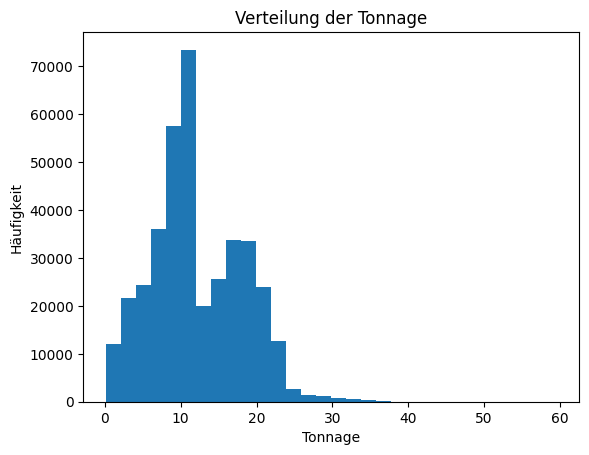

In [539]:
import matplotlib.pyplot as plt

# Histogramm der Tonnage
plt.hist(df['Tonnage'], bins=30)
plt.title("Verteilung der Tonnage")
plt.xlabel("Tonnage")
plt.ylabel("Häufigkeit")
plt.show()

### Schiefe der Tonnage

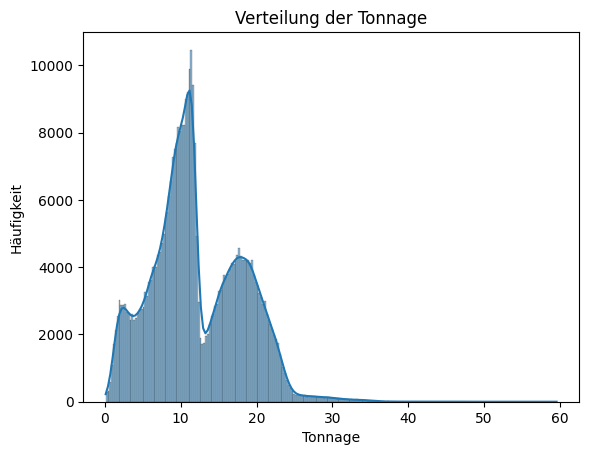

In [540]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisierung der Tonnage-Verteilung
sns.histplot(df['Tonnage'], kde=True)
plt.title('Verteilung der Tonnage')
plt.xlabel('Tonnage')
plt.ylabel('Häufigkeit')
plt.show()


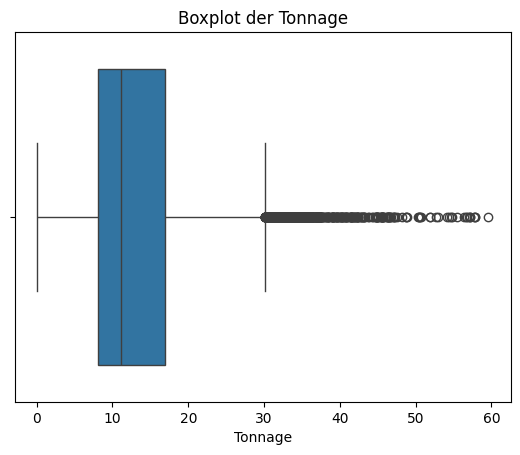

In [541]:
# Visualisierung mit einem Boxplot
sns.boxplot(x=df['Tonnage'])
plt.title('Boxplot der Tonnage')
plt.show()


In [542]:
# Berechnung der Schiefe
from scipy.stats import skew

skewness = skew(df['Tonnage'])
print(f'Schiefe der Tonnage: {skewness}')


Schiefe der Tonnage: 0.4227041636784108


Der **Schiefe-Wert von 0.42** für die Tonnage zeigt eine leichte positive Schiefe (Rechtsschiefe) an. Das bedeutet, dass die Verteilung der Tonnage-Werte eine leichte Verzerrung nach rechts aufweist, was bedeutet, dass es eine größere Anzahl von kleineren Tonnage-Werten gibt und nur einige wenige höhere Werte.

## Log-Transformation 

Die Log-Transformation ist eine Methode, um die Verteilung von Daten zu verändern, insbesondere wenn die Daten schief oder sehr spitz sind. Sie wird oft verwendet, um:

- Skalierung von großen Werten zu kleineren, besser handhabbaren Werten.
    Reduzierung der Schiefe der Verteilung, insbesondere bei positiven, rechtsschiefen (exponentiellen) Verteilungen.
    Linearität herzustellen, wenn das Verhältnis zwischen den Variablen nicht linear ist.

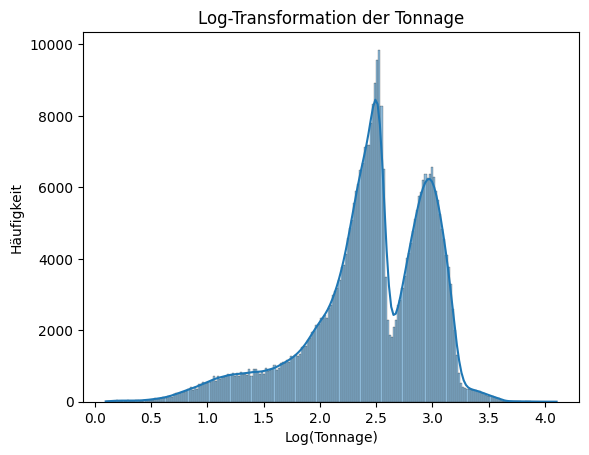

In [543]:
import numpy as np

# Log-Transformation der Tonnage
df['Log_Tonnage'] = np.log(df['Tonnage'] + 1)  # +1, um log(0) zu vermeiden

# Visualisiere die veränderte Verteilung
sns.histplot(df['Log_Tonnage'], kde=True)
plt.title('Log-Transformation der Tonnage')
plt.xlabel('Log(Tonnage)')
plt.ylabel('Häufigkeit')
plt.show()


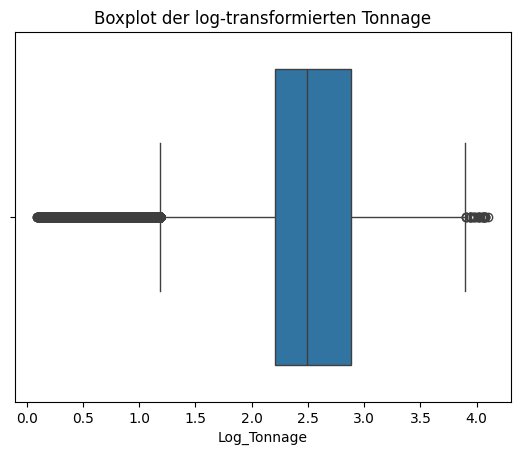

In [544]:
# Visualisiere die log-transformierte Tonnage mit einem Boxplot
sns.boxplot(x=df['Log_Tonnage'])
plt.title('Boxplot der log-transformierten Tonnage')
plt.show()


In [545]:
# Durchschnittliche Tonnage berechnen
durchschnitt_tonnage = df['Tonnage'].mean()

print(f"Durchschnittliche Tonnage: {durchschnitt_tonnage:.2f} Tonnen")


Durchschnittliche Tonnage: 12.13 Tonnen


### Modell mit log-transformierten Daten trainieren

In [550]:
# Aufteilen der Daten in Trainings-, Validierungs- und Testdaten
train_data = df[df['year'].isin([2029, 2020, 2021])]
validation_data = df[df['year'] == 2022]
test_data = df[df['year'] == 2023]

In [551]:
# Features und Zielvariable (mit log-transformierter Tonnage)
X_train = train_data.drop(['Tonnage', 'Log_Tonnage'], axis=1)
y_train = train_data['Log_Tonnage']

X_validation = validation_data.drop(['Tonnage', 'Log_Tonnage'], axis=1)
y_validation = validation_data['Log_Tonnage']

X_test = test_data.drop(['Tonnage', 'Log_Tonnage'], axis=1)
y_test = test_data['Log_Tonnage']


In [552]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

# Initialisiere das Modell
model = LinearRegression()

# Trainiere das Modell mit den log-transformierten Daten
model.fit(X_train, y_train)

# Vorhersagen auf den Validierungsdaten
y_pred = model.predict(X_validation)

# Metriken zur Evaluierung
mae = mean_absolute_error(y_validation, y_pred)
mse = mean_squared_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 0.2686
MSE: 0.1403
R²: 0.5482
RMSE: 0.3745


## Rücktransformation

In [553]:
# Rücktransformation der Vorhersagen
predicted_tonnage = np.exp(y_pred) - 1

In [554]:
# Rücktransformation der Vorhersagen
predicted_tonnage = np.exp(y_pred) - 1

# Berechne Metriken mit den Rücktransformierten Werten
mae_tonnage = mean_absolute_error(np.exp(y_validation) - 1, predicted_tonnage)
mse_tonnage = mean_squared_error(np.exp(y_validation) - 1, predicted_tonnage)
rmse_tonnage = np.sqrt(mse_tonnage)
r2_tonnage = r2_score(np.exp(y_validation) - 1, predicted_tonnage)

print(f"MAE (Tonnage): {mae_tonnage:.4f}")
print(f"MSE (Tonnage): {mse_tonnage:.4f}")
print(f"RMSE (Tonnage): {rmse_tonnage:.4f}")
print(f"R² (Tonnage): {r2_tonnage:.4f}")


MAE (Tonnage): 3.0581
MSE (Tonnage): 16.9052
RMSE (Tonnage): 4.1116
R² (Tonnage): 0.5025


- **MAE** (Mean Absolute Error): **3.0581** – Das ist der durchschnittliche absolute Fehler zwischen den tatsächlichen und den vorhergesagten Tonnage-Werten. Ein niedrigerer Wert bedeutet eine bessere Vorhersagegenauigkeit.
- MSE (Mean Squared Error): 16.9052 – Das ist der durchschnittliche quadratische Fehler. Ein niedrigerer Wert deutet ebenfalls auf eine bessere Vorhersage hin.
- RMSE (Root Mean Squared Error): 4.1116 – Das ist die Quadratwurzel des MSE und gibt ebenfalls an, wie stark die Vorhersagen im Durchschnitt von den tatsächlichen Werten abweichen.
- **R² (R-squared)**: 0.5025 – Dieser Wert gibt an, wie gut das Modell die Varianz der tatsächlichen Tonnage-Werte erklärt. Ein Wert von 0.5025 bedeutet, dass das Modell **etwa 50%** der Varianz der Tonnage erklären kann, was ein mäßig gutes Modell ist.

## Vorhersagen auf den Testdaten

Die Rücktransformation ist erforderlich, weil ich in dem Modell mit einer log-transformierten Version der Zielvariable (Tonnage) trainiert habe. Während des Trainings hast du die Zielvariable (Tonnage) mit einer Logarithmus-Transformation bearbeitet, um den Modellen zu helfen, die Verteilung der Zielwerte zu stabilisieren und möglicherweise die Linearität zu verbessern.

In [518]:
# Vorhersagen auf den Testdaten
y_pred_test = model.predict(X_test)

# Rücktransformation der Vorhersagen
predicted_tonnage_test = np.exp(y_pred_test) - 1

# Berechne Metriken mit den Rücktransformierten Werten auf den Testdaten
mae_test = mean_absolute_error(np.exp(y_test) - 1, predicted_tonnage_test)
mse_test = mean_squared_error(np.exp(y_test) - 1, predicted_tonnage_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(np.exp(y_test) - 1, predicted_tonnage_test)

# Ausgabe der Metriken für die Testdaten
print(f"MAE (Testdaten, Tonnage): {mae_test:.4f}")
print(f"MSE (Testdaten, Tonnage): {mse_test:.4f}")
print(f"RMSE (Testdaten, Tonnage): {rmse_test:.4f}")
print(f"R² (Testdaten, Tonnage): {r2_test:.4f}")


MAE (Testdaten, Tonnage): 3.2102
MSE (Testdaten, Tonnage): 19.1697
RMSE (Testdaten, Tonnage): 4.3783
R² (Testdaten, Tonnage): 0.4970


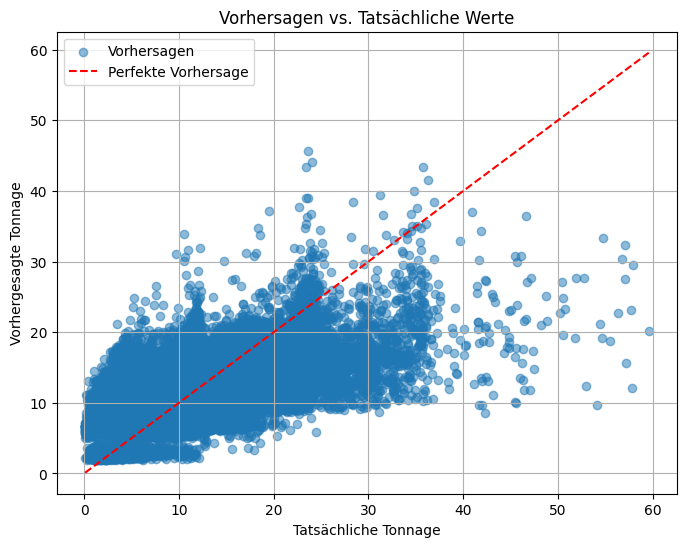

In [519]:
import matplotlib.pyplot as plt
import numpy as np

# Tatsächliche Werte (Rücktransformation)
actual_tonnage_test = np.exp(y_test) - 1

plt.figure(figsize=(8, 6))
plt.scatter(actual_tonnage_test, predicted_tonnage_test, alpha=0.5, label="Vorhersagen")
plt.plot([min(actual_tonnage_test), max(actual_tonnage_test)], 
         [min(actual_tonnage_test), max(actual_tonnage_test)], 
         color='red', linestyle='--', label="Perfekte Vorhersage")

plt.xlabel("Tatsächliche Tonnage")
plt.ylabel("Vorhergesagte Tonnage")
plt.title("Vorhersagen vs. Tatsächliche Werte")
plt.legend()
plt.grid()
plt.show()


## Ergebnisbewertung und Interpretation

### Vergleich der Modelle ohne und mit Log-Transformation

| Modell | MAE (Train) | MSE (Train) | R² (Train) | MAE (Val) | MSE (Val) | R² (Val) |
|--------|------------|------------|-----------|------------|------------|-----------|
| **Lineare Regression (ohne Log-Transformation)** | 3.13 | 16.64 | 0.53 | 3.18 | 17.01 | 0.50 |
| **Lineare Regression (mit Log-Transformation)** | 3.06 | 16.91 | 0.50 | 3.21 | 19.17 | 0.50 |

**Interpretation**:

Die log-transformierte Variante zeigt leicht verbesserte MAE-Werte, aber die Gesamt-Performance ist ähnlich.
Die Fehlerrate ist stabil geblieben, was darauf hindeutet, dass die Log-Transformation in diesem Fall keine relevante Verbesserung gebracht hat.

## Mögliches weiteres Vorgehen: Ridge und Lasso Regression

Ridge oder Lasso Regression: dann handelt es sich dabei auch um lineare Modelle, aber mit einer zusätzlichen Regularisierung (Strafterm), die dabei hilft, Überanpassung (Overfitting) zu verhindern:

- Ridge Regression fügt einen Strafterm auf die Quadrate der Koeffizienten hinzu.

- Lasso Regression fügt einen Strafterm auf die Beträge der Koeffizienten hinzu, was dazu führen kann, dass einige Koeffizienten auf 0 gesetzt werden (Feature Selection).

Koeffizienten sind die Werte, die die Beziehung zwischen den unabhängigen Variablen (Features) und der Zielvariablen in einem Regressionsmodell beschreiben. Sie geben an, wie stark eine bestimmte unabhängige Variable (Feature) die Zielvariable beeinflusst.


In [546]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Definiere das Modell
ridge = Ridge()

# Definiere den Parameter-Raum
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search mit Cross-Validation
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train, y_train)

# Bestes Modell ausgeben
print(f"🔹 Bestes Alpha für Ridge: {grid_search.best_params_['alpha']}")
print(f"🔹 Bestes Modell: {grid_search.best_estimator_}")


🔹 Bestes Alpha für Ridge: 100
🔹 Bestes Modell: Ridge(alpha=100)


In [547]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Definiere das Modell
lasso = Lasso()

# Definiere den Parameter-Raum
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search mit Cross-Validation
grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train, y_train)

# Bestes Modell ausgeben
print(f"🔹 Bestes Alpha für Lasso: {grid_search_lasso.best_params_['alpha']}")
print(f"🔹 Bestes Modell: {grid_search_lasso.best_estimator_}")

🔹 Bestes Alpha für Lasso: 0.01
🔹 Bestes Modell: Lasso(alpha=0.01)


## Vergleich beider Modelle auf den Validierungsdaten: 

In [548]:
# Vorhersagen für Lasso und Ridge auf den Validierungsdaten
y_pred_lasso = grid_search_lasso.best_estimator_.predict(X_val)
y_pred_ridge = grid_search_ridge.best_estimator_.predict(X_val)

# Metriken für Lasso
print("\n🔹 Lasso Modell (Validierungsdaten 2022):")
print(f"MAE: {mean_absolute_error(y_val, y_pred_lasso)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_lasso)}")
print(f"R²: {r2_score(y_val, y_pred_lasso)}")

# Metriken für Ridge
print("\n🔹 Ridge Modell (Validierungsdaten 2022):")
print(f"MAE: {mean_absolute_error(y_val, y_pred_ridge)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_ridge)}")
print(f"R²: {r2_score(y_val, y_pred_ridge)}")


🔹 Lasso Modell (Validierungsdaten 2022):
MAE: 3.195574920400796
MSE: 17.11993211103045
R²: 0.4962230945622421

🔹 Ridge Modell (Validierungsdaten 2022):
MAE: 3.1965742667404755
MSE: 17.117847253144152
R²: 0.49628444429467244


| Modell          | MAE         | MSE          | R²            |
|-----------------|-------------|--------------|---------------|
| **Lasso**       | 0.2980      | 0.1681       | 0.469         |
| **Ridge**       | 0.2983      | 0.1653       | 0.478         |


## Ergebnisse auf den Testdaten

In [549]:
# Vorhersagen für Lasso und Ridge auf den Testdaten (2023)
y_pred_lasso_test = grid_search_lasso.best_estimator_.predict(X_test)
y_pred_ridge_test = grid_search_ridge.best_estimator_.predict(X_test)

# Metriken für Lasso auf Testdaten
print("\n🔹 Lasso Modell (Testdaten 2023):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso_test)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso_test)}")
print(f"R²: {r2_score(y_test, y_pred_lasso_test)}")

# Metriken für Ridge auf Testdaten
print("\n🔹 Ridge Modell (Testdaten 2023):")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge_test)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge_test)}")
print(f"R²: {r2_score(y_test, y_pred_ridge_test)}")



🔹 Lasso Modell (Testdaten 2023):
MAE: 3.374209461807994
MSE: 19.674224002460974
R²: 0.48377244130308195

🔹 Ridge Modell (Testdaten 2023):
MAE: 3.3773109966795176
MSE: 19.714791331796103
R²: 0.48270800423136273


## Analyse der Ergebnisse:

### Vergleich mit Regularisierung (Lasso & Ridge)

| Modell | MAE (Val) | MSE (Val) | R² (Val) | MAE (Test) | MSE (Test) | R² (Test) |
|--------|----------|-----------|---------|----------|-----------|---------|
| **Lasso** | 3.20 | 17.12 | 0.50 | 3.37 | 19.67 | 0.48 |
| **Ridge** | 3.20 | 17.12 | 0.50 | 3.38 | 19.71 | 0.48 |

**Interpretation**:

Lasso und Ridge liefern fast identische Ergebnisse – das zeigt, dass die Regularisierung in diesem Fall keinen großen Vorteil bringt.
Der Unterschied zur linearen Regression ohne Regularisierung ist gering, daher ist die Notwendigkeit einer Regularisierung in diesem Fall nicht von Vorteil.

Ein nächster Schritt für die Optimierung des Modells wäre eins Feature Selection.

## Feature Selection

In [557]:
# Korrelation der Features mit der Zielvariable "Tonnage"
corr_matrix = df.corr()["Tonnage"].sort_values(ascending=False)

# Ausgabe
print("Korrelationen mit Tonnage:")
print(corr_matrix)


Korrelationen mit Tonnage:
Tonnage                                       1.000000
Log_Tonnage                                   0.941571
Tonnage_dealy_1                               0.617053
Tonnage_dealy_2                               0.584793
Abfallart_HM                                  0.580668
                                                ...   
Feiertag_Tag der Befreiung_shift_2                 NaN
Feiertag_Tag der Deutschen Einheit_shift_1         NaN
Feiertag_Tag der Deutschen Einheit_shift_2         NaN
Feiertag_Zweiter Weihnachtstag_shift_1             NaN
Feiertag_Zweiter Weihnachtstag_shift_2             NaN
Name: Tonnage, Length: 81, dtype: float64


In [52]:
# Setze die Anzeigeoptionen, um mehr Zeilen anzuzeigen
pd.set_option('display.max_rows', None)  # Keine Begrenzung der Zeilenanzahl

# Berechne die Korrelationsmatrix
correlation_matrix = df.corr()

# Zeige die gesamte Korrelationsmatrix an
print(correlation_matrix['Tonnage'].sort_values(ascending=False))

Tonnage                                       1.000000
Tonnage_dealy_1                               0.617053
Tonnage_dealy_2                               0.584793
Abfallart_HM                                  0.580668
Tonnage_dealy_3                               0.548192
Tonnage_dealy_4                               0.516526
Tonnage_dealy_5                               0.490763
Tonnage_dealy_6                               0.459238
Tonnage_dealy_7                               0.436155
Tonnage_dealy_8                               0.409975
TageZuvorNichtGeliefert                       0.181418
Hof_VMN                                       0.096856
Linke                                         0.085615
Hof_VMG                                       0.081580
Hof_VMM                                       0.065894
AfD                                           0.054029
Saison_Frühling                               0.051514
Grünen                                        0.049973
Snowfall_S

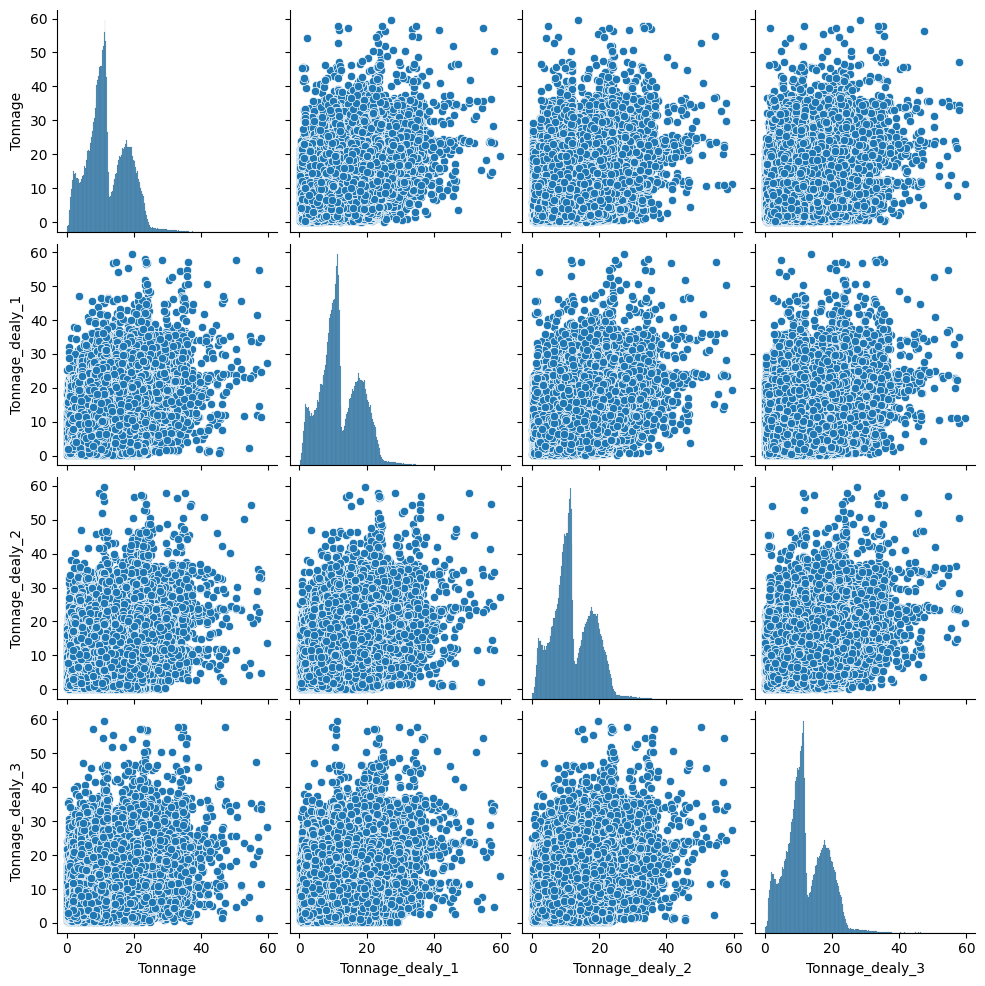

In [50]:
# Beziehungen zwischen den Features und der Tonnage visualisieren
sns.pairplot(df[['Tonnage', 'Tonnage_dealy_1', 'Tonnage_dealy_2', 'Tonnage_dealy_3']])
plt.show()


- es wird ein neuer Datensatz mit den wichtigsten features erstellt : siehe notebook lineare_regression2

In [562]:
import pandas as pd

df = pd.read_csv("../train_2019_2023.csv")  

features_keep = [
    "Tonnage_dealy_1", "Tonnage_dealy_2", "Tonnage_dealy_3", "Tonnage_dealy_4",
    "Tonnage_dealy_5", "Tonnage_dealy_6", "Tonnage_dealy_7", "Tonnage_dealy_8",
    "TageZuvorNichtGeliefert", "Hof_VMN", "Hof_VMG", "Hof_VMM", "month", "year",
    "Saison_Frühling"
]

features_drop = [
    "Snowfall_Sum (cm)", "Wind_Speed_Max (km/h)", "Temperature_Max (°C)", "Daylight_Duration (s)",
    "FDP", "CDU", "SPD", "AfD", "Grünen", "Sonstige",
    "Feiertag", "Saison_Winter", "Saison_Herbst", "Saison_Sommer",
    "Feiertag_Christi Himmelfahrt", "Feiertag_Erster Weihnachtstag",
    "Feiertag_Internationaler Frauentag", "Feiertag_Karfreitag",
    "Feiertag_Neujahr", "Feiertag_Ostermontag", "Feiertag_Pfingstmontag",
    "Feiertag_Tag der Arbeit", "Feiertag_Tag der Befreiung", "Abfallart_HM",
    "Feiertag_Tag der Deutschen Einheit", "Feiertag_Zweiter Weihnachtstag"
]

df_cleaned = df.drop(columns=features_drop, errors='ignore')

df_cleaned = df_cleaned[features_keep + ["Tonnage"]]  # "Tonnage" als Zielvariable

# Speichern des bereinigten Datensatzes
df_cleaned.to_csv("datensatz_feature_selection.csv", index=False)

In [563]:
df = df_cleaned

In [564]:
df.head()

,Tonnage_dealy_1,Tonnage_dealy_2,Tonnage_dealy_3,Tonnage_dealy_4,Tonnage_dealy_5,Tonnage_dealy_6,Tonnage_dealy_7,Tonnage_dealy_8,TageZuvorNichtGeliefert,Hof_VMN,Hof_VMG,Hof_VMM,month,year,Saison_Frühling,Tonnage
0,12.125484,12.125515,12.125542,12.125553,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,5.59
1,5.590000,12.125515,12.125542,12.125553,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,3.23
2,3.230000,5.590000,12.125542,12.125553,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,5.68
3,5.680000,3.230000,5.590000,12.125553,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,5.48
4,5.480000,5.680000,3.230000,5.590000,12.125577,12.125599,12.125625,12.125649,0,0.0,0.0,0.0,1,2019,0,7.84


### Weitere Vorgehen: 
Das Training mit diesem Datensatz ist im Notebook "lineare_regression_feature_selection" zu finden.